<a href="https://colab.research.google.com/github/Cardonadlr/IARN_6TO_SEM_2025/blob/main/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDADES 7: REDES NEURONALES ARTIFICIALES

Leonardo Saul Cardona de la Rosa 2049503

Carlos Alberto Cruz Rueda 2132272

Gerardo Aldahir Rivera Maranetes 1978706

N4-N6

1.- CARGAR LIBRERIAS

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2.- CARGAR DATOS

In [21]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

3-. PREPROCESMIENTO DE DATOS

In [22]:
# Redimensionar los datos a un arreglo 1D y normalizar
train_data = train_data.reshape(-1, 28*28) / 255.0
test_data = test_data.reshape(-1, 28*28) / 255.0

# Convertir etiquetas a codificación one-hot
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

print(f"Dimensiones de los datos de entrenamiento: {train_data.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento: {train_labels.shape}")
print(f"Dimensiones de los datos de prueba: {test_data.shape}")
print(f"Dimensiones de las etiquetas de prueba: {test_labels.shape}")

Dimensiones de los datos de entrenamiento: (60000, 784)
Dimensiones de las etiquetas de entrenamiento: (60000, 10)
Dimensiones de los datos de prueba: (10000, 784)
Dimensiones de las etiquetas de prueba: (10000, 10)


4.- SELECCION Y ENTRENAMIENTO DEL MODELO

In [23]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)), # Capa oculta
    keras.layers.Dense(10, activation='softmax')                      # Capa de salida
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8599 - loss: 0.4904 - val_accuracy: 0.9542 - val_loss: 0.1615
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9600 - loss: 0.1385 - val_accuracy: 0.9643 - val_loss: 0.1224
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9731 - loss: 0.0892 - val_accuracy: 0.9711 - val_loss: 0.0989
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9812 - loss: 0.0635 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9861 - loss: 0.0472 - val_accuracy: 0.9747 - val_loss: 0.0851
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9893 - loss: 0.0361 - val_accuracy: 0.9729 - val_loss: 0.0905
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.9755 - val_loss: 0.0869
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9932 - loss: 0.0227 

5.- PRUEBA DEL MODELO

In [24]:
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f"Exactitud de predicción del modelo en el conjunto de prueba: {accuracy*100:.2f}%")

Exactitud de predicción del modelo en el conjunto de prueba: 97.82%


6.- PREDICCIONES

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- 5 Predicciones de Prueba ---
Predicción para la imagen 1: 7, Valor Real: 7


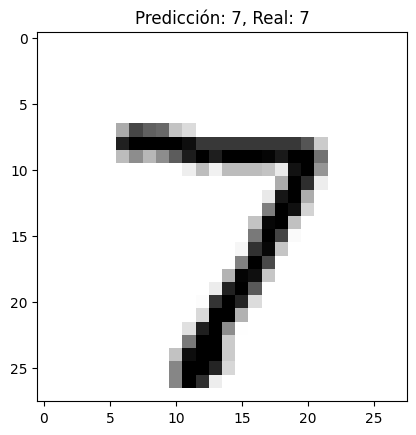

Predicción para la imagen 2: 2, Valor Real: 2


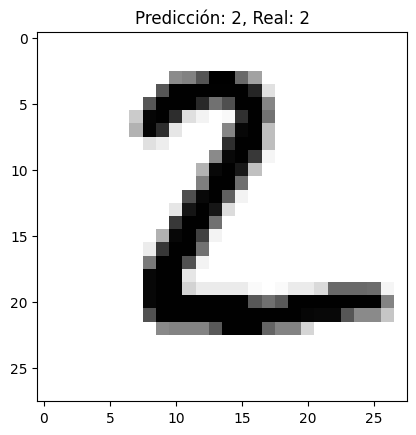

Predicción para la imagen 3: 1, Valor Real: 1


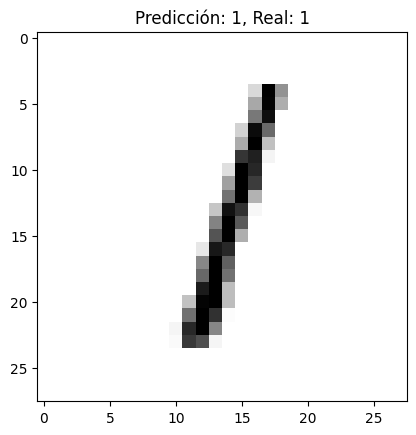

Predicción para la imagen 4: 0, Valor Real: 0


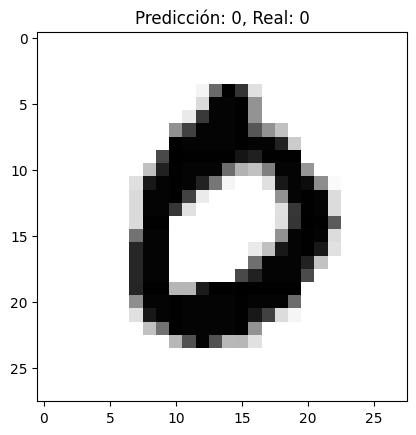

Predicción para la imagen 5: 4, Valor Real: 4


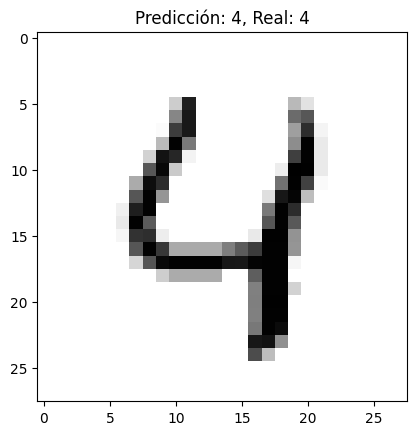

In [25]:
predictions = model.predict(test_data)

print("\n--- 5 Predicciones de Prueba ---")
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])

    print(f"Predicción para la imagen {i+1}: {predicted_label}, Valor Real: {true_label}")

    # Mostrar la imagen
    plt.imshow(test_data[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicción: {predicted_label}, Real: {true_label}")
    plt.show()